In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [7]:
df_obd = pd.read_csv("data/OBD-II/exp1_14drivers_14cars_dailyRoutes.csv")
df_obd.head(3)

,TIMESTAMP,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,LONG TERM FUEL TRIM BANK 2,FUEL_TYPE,AIR_INTAKE_TEMP,FUEL_PRESSURE,SPEED,SHORT TERM FUEL TRIM BANK 2,SHORT TERM FUEL TRIM BANK 1,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",NaN,1009.0,49.0,"4,49",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:28,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
1,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",NaN,1003.0,52.0,"4,51",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:35,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2,1.502903e+12,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",NaN,995.0,51.0,"4,48",NaN,Biodiesel_Ethanol,59.0,NaN,0.0,NaN,NaN,00:03:43,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0


In [8]:
df_obd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60439 entries, 0 to 60438
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TIMESTAMP                    47514 non-null  float64
 1   MARK                         47459 non-null  object 
 2   MODEL                        47459 non-null  object 
 3   CAR_YEAR                     47459 non-null  float64
 4   ENGINE_POWER                 47459 non-null  object 
 5   AUTOMATIC                    47459 non-null  object 
 6   VEHICLE_ID                   47514 non-null  object 
 7   BAROMETRIC_PRESSURE(KPA)     10212 non-null  float64
 8   ENGINE_COOLANT_TEMP          33964 non-null  float64
 9   FUEL_LEVEL                   2994 non-null   object 
 10  ENGINE_LOAD                  30972 non-null  object 
 11  AMBIENT_AIR_TEMP             3619 non-null   float64
 12  ENGINE_RPM                   33859 non-null  float64
 13  INTAKE_MANIFOLD_

In [9]:
df_obd[["VEHICLE_ID", "MARK", "MODEL"]].drop_duplicates().sort_values("VEHICLE_ID")

,VEHICLE_ID,MARK,MODEL
0,car1,chevrolet,agile
35916,car10,fiat,siena
28612,car11,toyota,corolla
43408,car12,nissan,versa
45274,car13,citroen,c3
47334,car14,volkswagen,voyage
28750,car2,ford,eco_sport
13755,car3,honda,fit
14658,car4,renault,duster
17578,car5,NaN,NaN


In [10]:
df_obd["VEHICLE"] = (df_obd["MARK"].fillna("") + " " + df_obd["MODEL"].fillna("")).str.strip()
df_obd.loc[df_obd["VEHICLE"] == "", "VEHICLE"] = df_obd["VEHICLE_ID"]

In [11]:
df_obd.groupby(["DTC_NUMBER", "TROUBLE_CODES"]).size().reset_index(name="row_count").sort_values("DTC_NUMBER")

,DTC_NUMBER,TROUBLE_CODES,row_count
0,MIL is OFF0 codes,C0300,5673
1,MIL is OFF0 codes,P0078B0004P3000,12
2,MIL is OFF0 codes,P0078U1004P3000,29
3,MIL is OFF0 codes,P0079C1004P3000,28
4,MIL is OFF0 codes,P0079P1004P3000,5
5,MIL is OFF0 codes,P0079P2004P3000,46
6,MIL is OFF0 codes,P007EP2036P18D0,19
7,MIL is OFF0 codes,P007EP2036P18E0,18
8,MIL is OFF0 codes,P007EP2036P18F0,9
9,MIL is OFF0 codes,P007FP2036P18D0,3


In [12]:
df_obd.drop(columns=["DTC_NUMBER", "VEHICLE_ID"], inplace=True)

In [77]:
# Bazı OBD-2 kodları birleşik girilmiş. 5 karaktere göre ayıracağız.
# OBD-2 standardına göre ilk karakter P/B/C/U hrtflerinden biri, ardından 4 rakam
import re
pattern = r"[PBCU]\d{4}"
df_obd["codes_list"] = df_obd["TROUBLE_CODES"].astype(str).apply(
    lambda x: re.findall(pattern, x) if x not in ["None", "nan"] else [])

# Kaç adet hata kodu olduğuna dair yeni sütun
df_obd["code_count"] = df_obd["codes_list"].apply(len)

In [78]:
# Hangi harf kodu kaç kez geçiyor? Sütun bazlı gösterim
df_obd["tc_P"] = df_obd["codes_list"].apply(lambda lst: sum(c.startswith("P") for c in lst))
df_obd["tc_B"] = df_obd["codes_list"].apply(lambda lst: sum(c.startswith("B") for c in lst))
df_obd["tc_C"] = df_obd["codes_list"].apply(lambda lst: sum(c.startswith("C") for c in lst))
df_obd["tc_U"] = df_obd["codes_list"].apply(lambda lst: sum(c.startswith("U") for c in lst))

In [79]:
# Bazı sensör verileri % formatında geliyor.
# Üreticinin çalışma şekline bağlı olarak ondalıklar virgüllü olabiliyor.
def clean_percent(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace("%", "").replace(",", ".")
    try:
        return float(x)
    except:
        return np.nan

In [80]:
percent_cols = [
    "FUEL_LEVEL",
    "ENGINE_LOAD",
    "THROTTLE_POS",
    "SHORT TERM FUEL TRIM BANK 1",
    "SHORT TERM FUEL TRIM BANK 2",
    "LONG TERM FUEL TRIM BANK 2",
    "TIMING_ADVANCE",
    "EQUIV_RATIO",
]

for col in percent_cols:
    df_obd[col] = df_obd[col].apply(clean_percent)

In [81]:
# ENGINE_RUNTIME kolonunda 00:03:15 gibi süreler var.
# Bunları saniye bazında değerlendireceğiz.
def runtime_to_seconds(x):
    if pd.isna(x):
        return np.nan
    try:
        h, m, s = x.split(":")
        return int(h)*3600 + int(m)*60 + int(s)
    except:
        return np.nan

df_obd["ENGINE_RUNTIME"] = df_obd["ENGINE_RUNTIME"].apply(runtime_to_seconds)

In [82]:
# Zaman bilgisini gerçek datetime formatına çekiyoruz.
# Dataset birden fazla araçtan geldiği için sıralama kritik.
df_obd["TIMESTAMP"] = pd.to_datetime(df_obd["TIMESTAMP"], unit="ms", errors="coerce")
df_obd = df_obd.dropna(subset=["TIMESTAMP"])
df_obd = df_obd.sort_values(["VEHICLE_ID", "TIMESTAMP"]).set_index("TIMESTAMP")

In [83]:
# Arıza verisi varsa bunu binary flag'e dönüştürüyoruz.
df_obd["fault_flag"] = df_obd["TROUBLE_CODES"].notna().astype(int)

In [84]:
# MAF sensörü bazı araçlarda virgüllü formatta gelebiliyor.
# Motorsports telemetry datalarında sık görülen bir durum.
df_obd["MAF"] = (
    df_obd["MAF"]
    .astype(str)
    .str.replace(",", ".", regex=False)
)
df_obd["MAF"] = pd.to_numeric(df_obd["MAF"], errors="coerce")

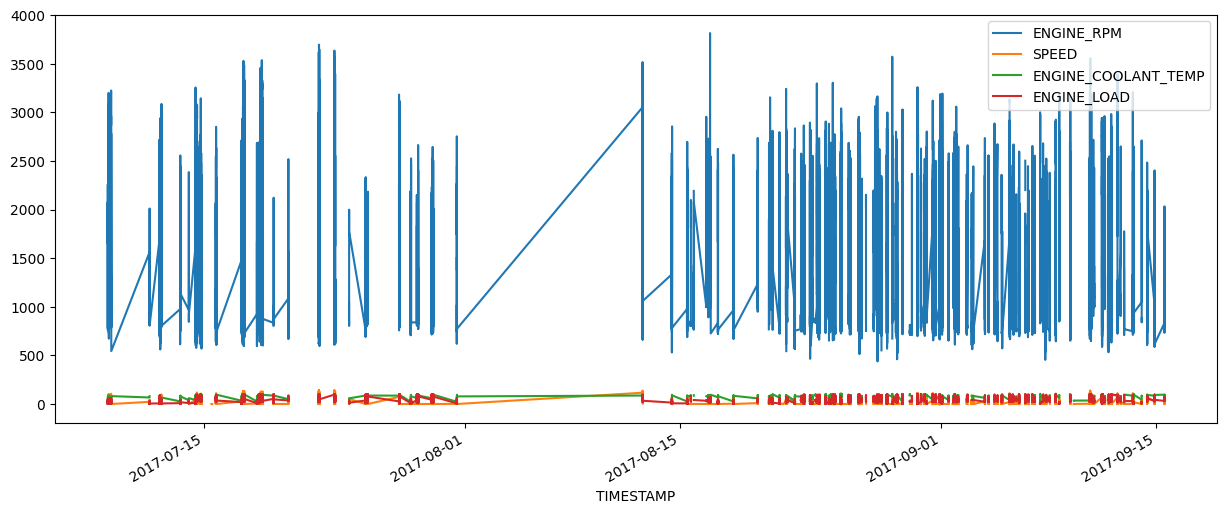

In [85]:
# Sensör davranışını hızlı bir sanity check ile gözlemlemek için tüm dataset üzerinden 4 ana sensörü çiziyoruz.
df_obd[["ENGINE_RPM", "SPEED", "ENGINE_COOLANT_TEMP", "ENGINE_LOAD"]].plot(figsize=(15, 6))
plt.show()

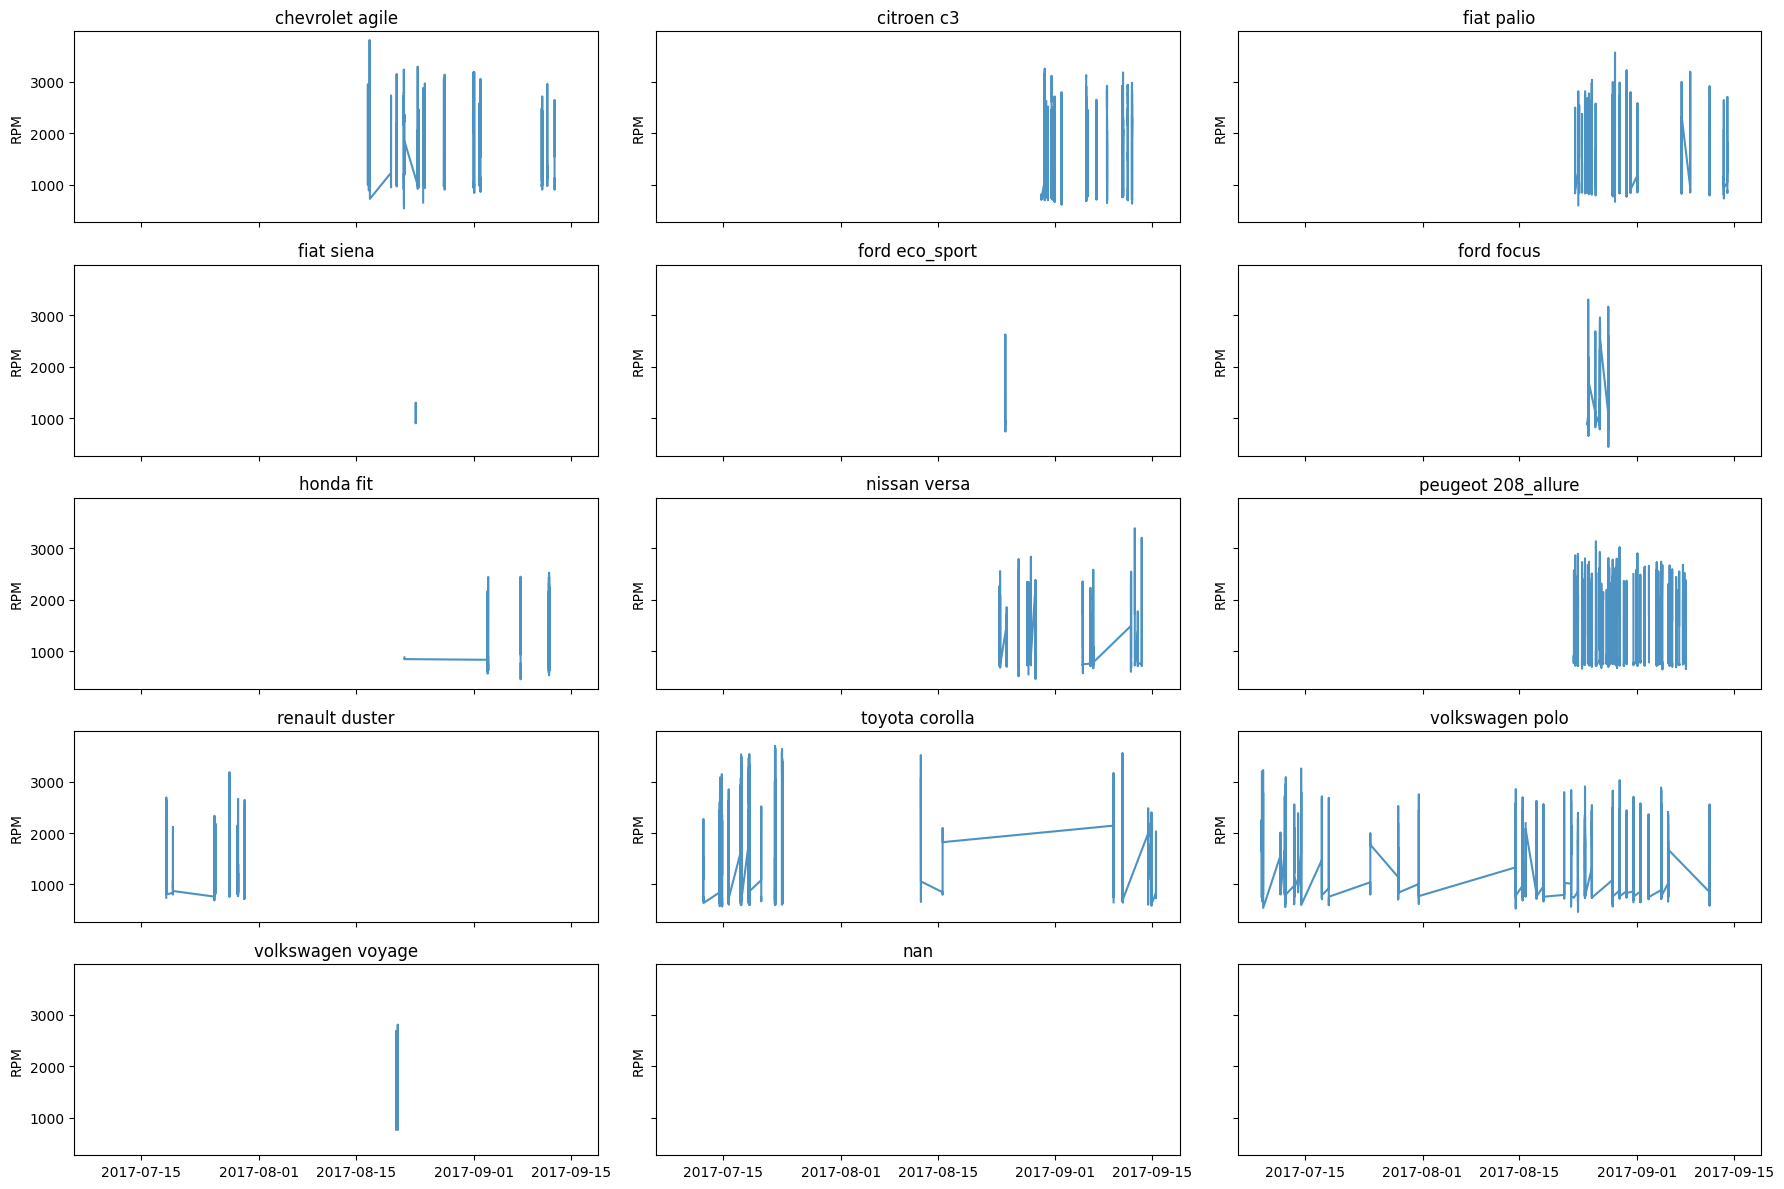

In [86]:
# Araç bazı sensör check
vehicles = df_obd["VEHICLE_ID"].unique()
n = len(vehicles)

rows = (n // 3) + 1
cols = 3

# Devir Sayısı
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, vid in zip(axes, vehicles):
    g = df_obd[df_obd["VEHICLE_ID"] == vid]
    ax.plot(g.index, g["ENGINE_RPM"], alpha=0.8)
    ax.set_title(vid)
    ax.set_ylabel("RPM")

plt.tight_layout()
plt.show()

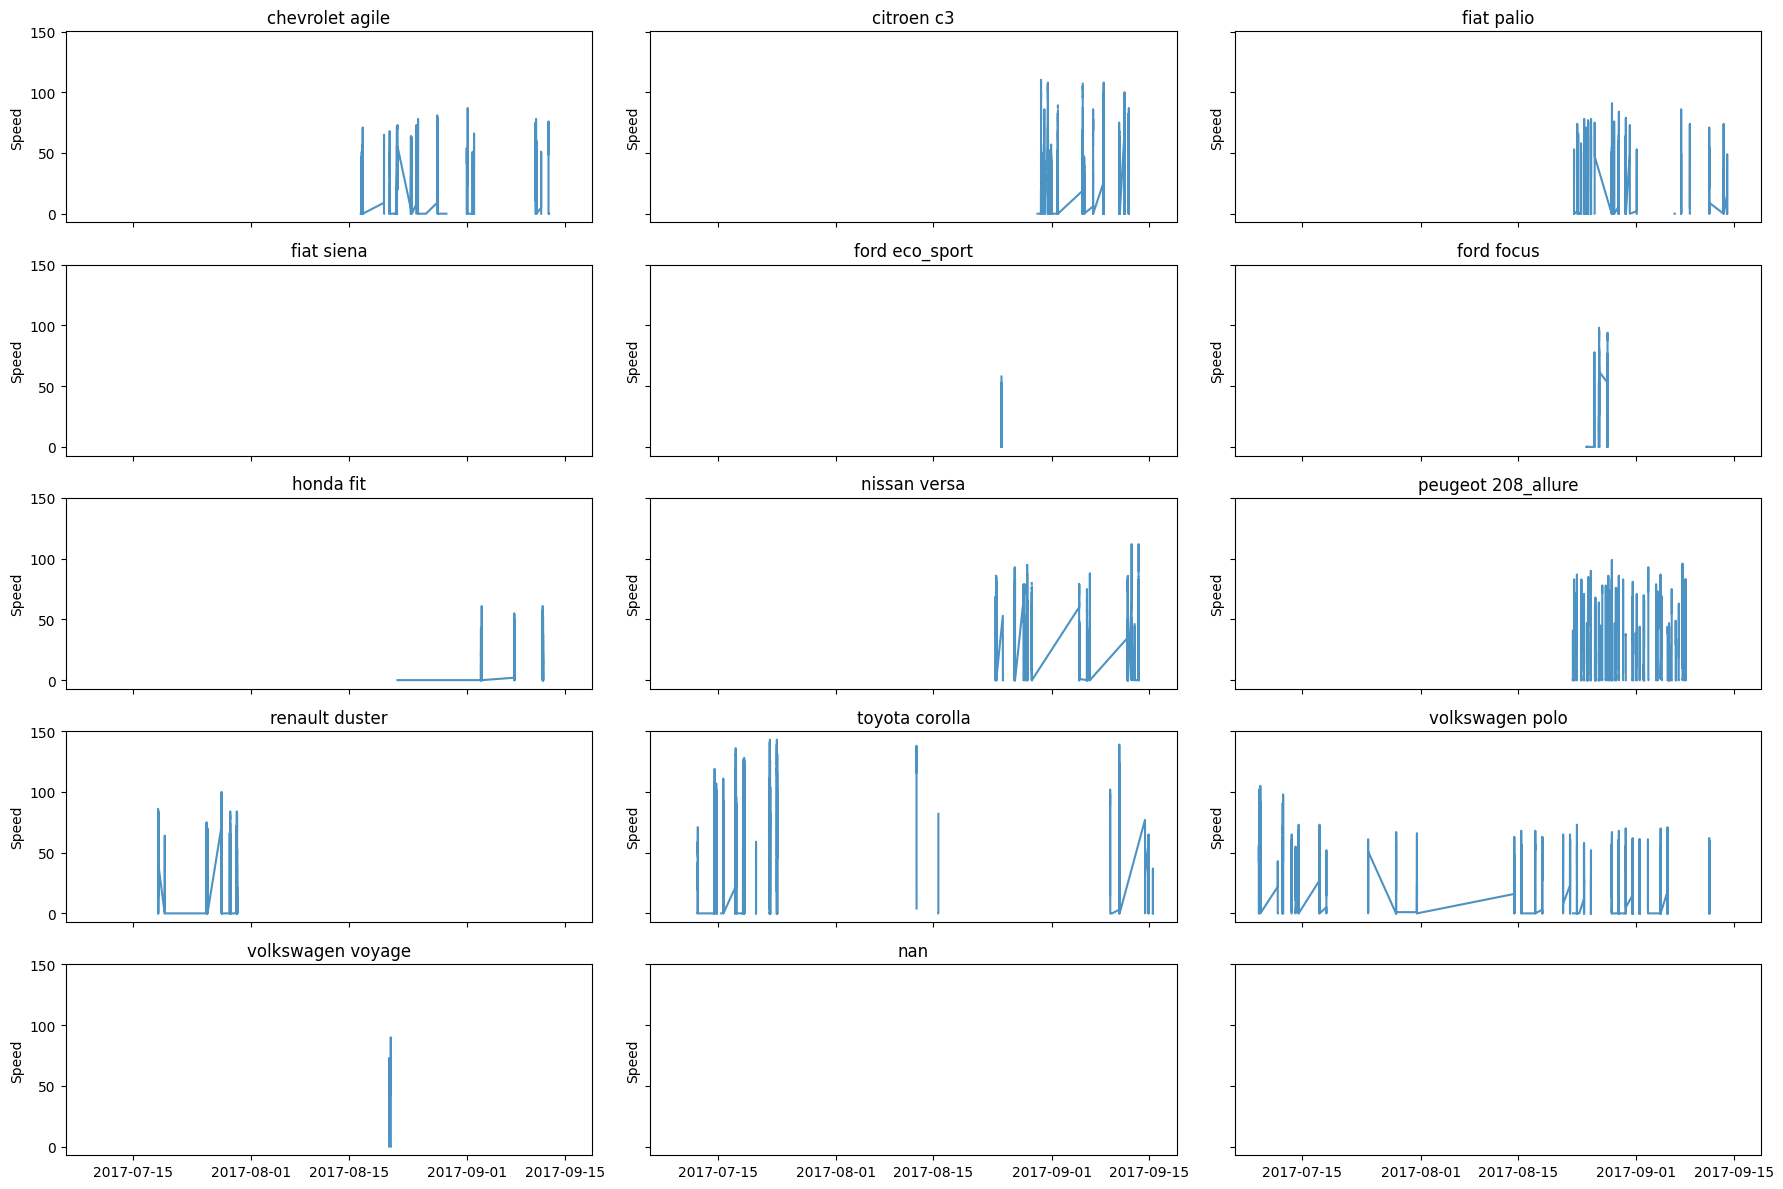

In [87]:
# Hız
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, vid in zip(axes, vehicles):
    g = df_obd[df_obd["VEHICLE_ID"] == vid]
    ax.plot(g.index, g["SPEED"], alpha=0.8)
    ax.set_title(vid)
    ax.set_ylabel("Speed")

plt.tight_layout()
plt.show()

In [88]:
# İncelemeye göre 8 araç modellemeye uygun, geri kalanlar drop
valid_vehicles = ["chevrolet agile", "toyota corolla", "volkswagen polo", "peugeot 208_allure", "fiat palio", "renault duster", "citroen c3", "nissan versa"]
df_obd = df_obd[df_obd["VEHICLE_ID"].isin(valid_vehicles)]

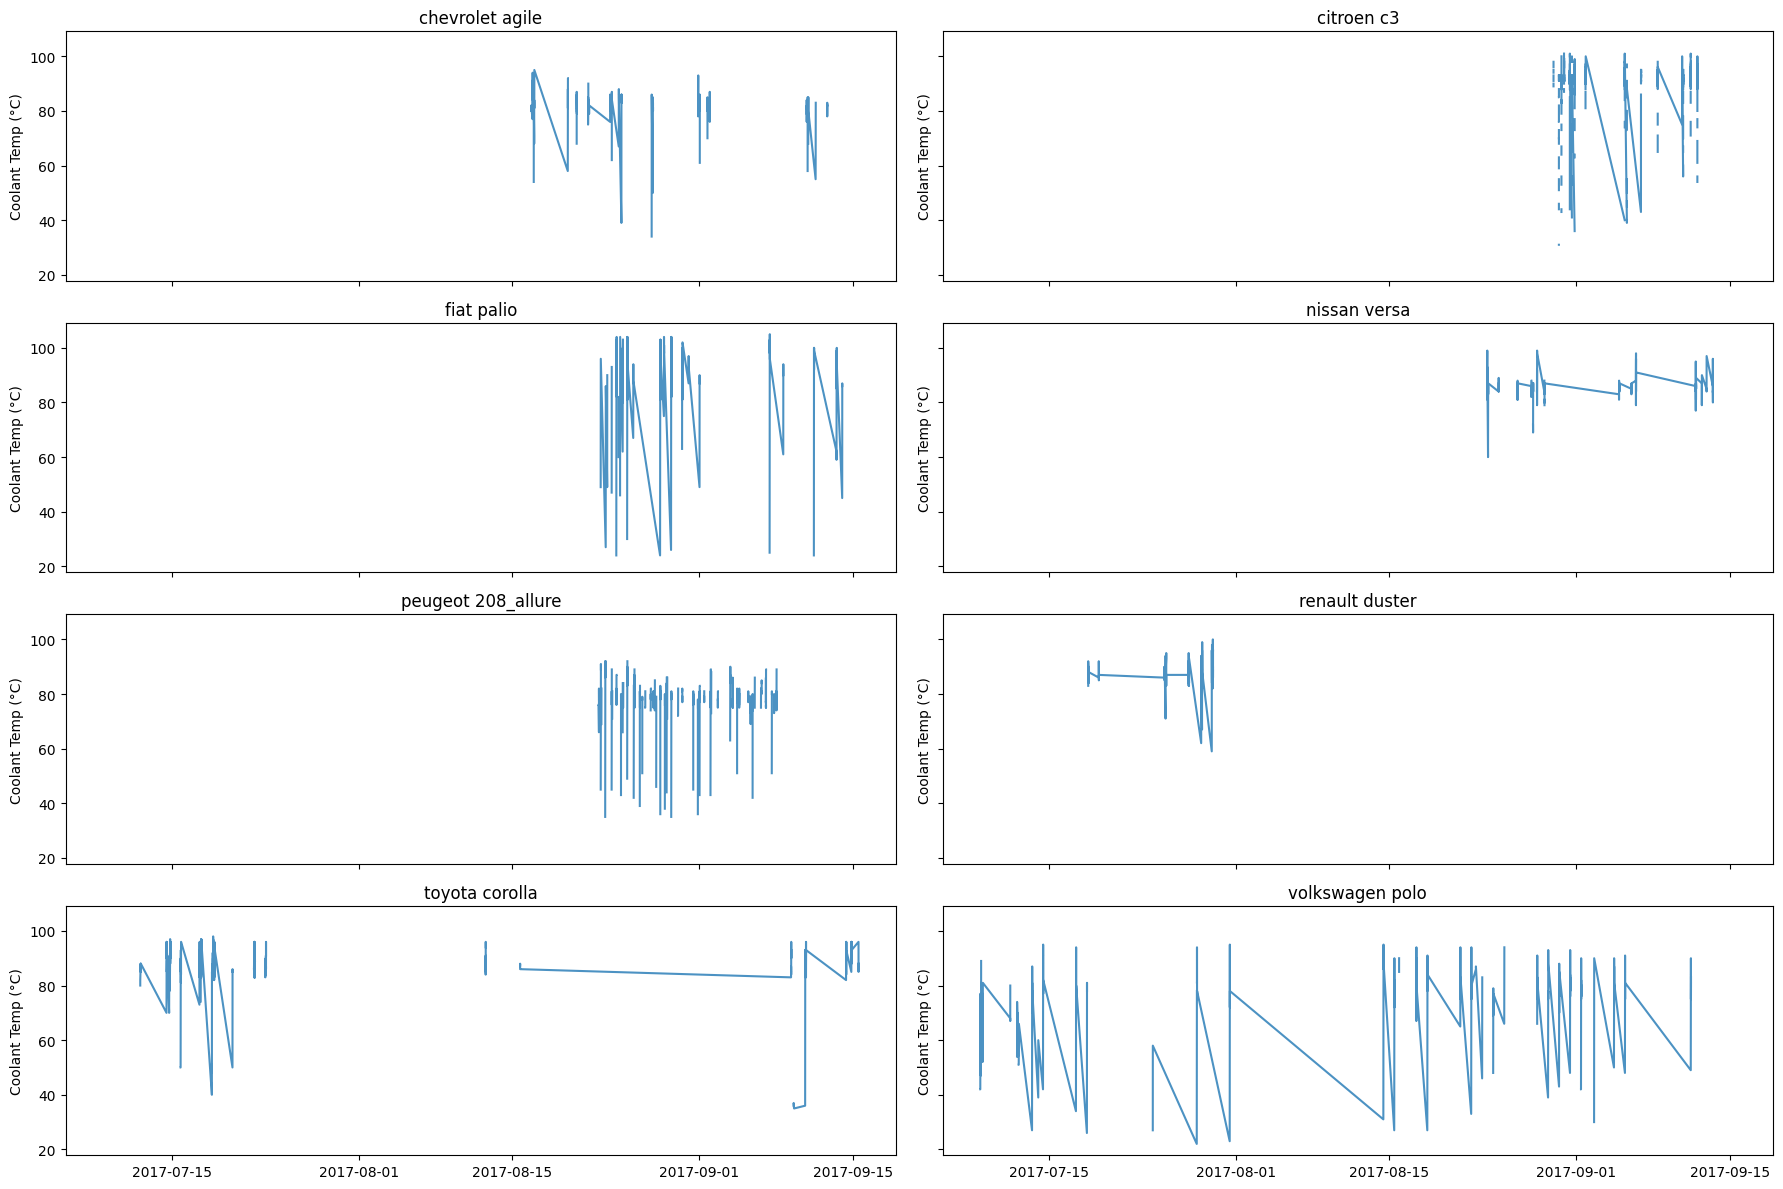

In [89]:
# Soğutma suyu sıcaklığı
vehicles = df_obd["VEHICLE_ID"].unique()

rows, cols = 4, 2

fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, vid in zip(axes, vehicles):
    g = df_obd[df_obd["VEHICLE_ID"] == vid]
    ax.plot(g.index, g["ENGINE_COOLANT_TEMP"], alpha=0.8)
    ax.set_title(vid)
    ax.set_ylabel("Coolant Temp (°C)")

plt.tight_layout()
plt.show()

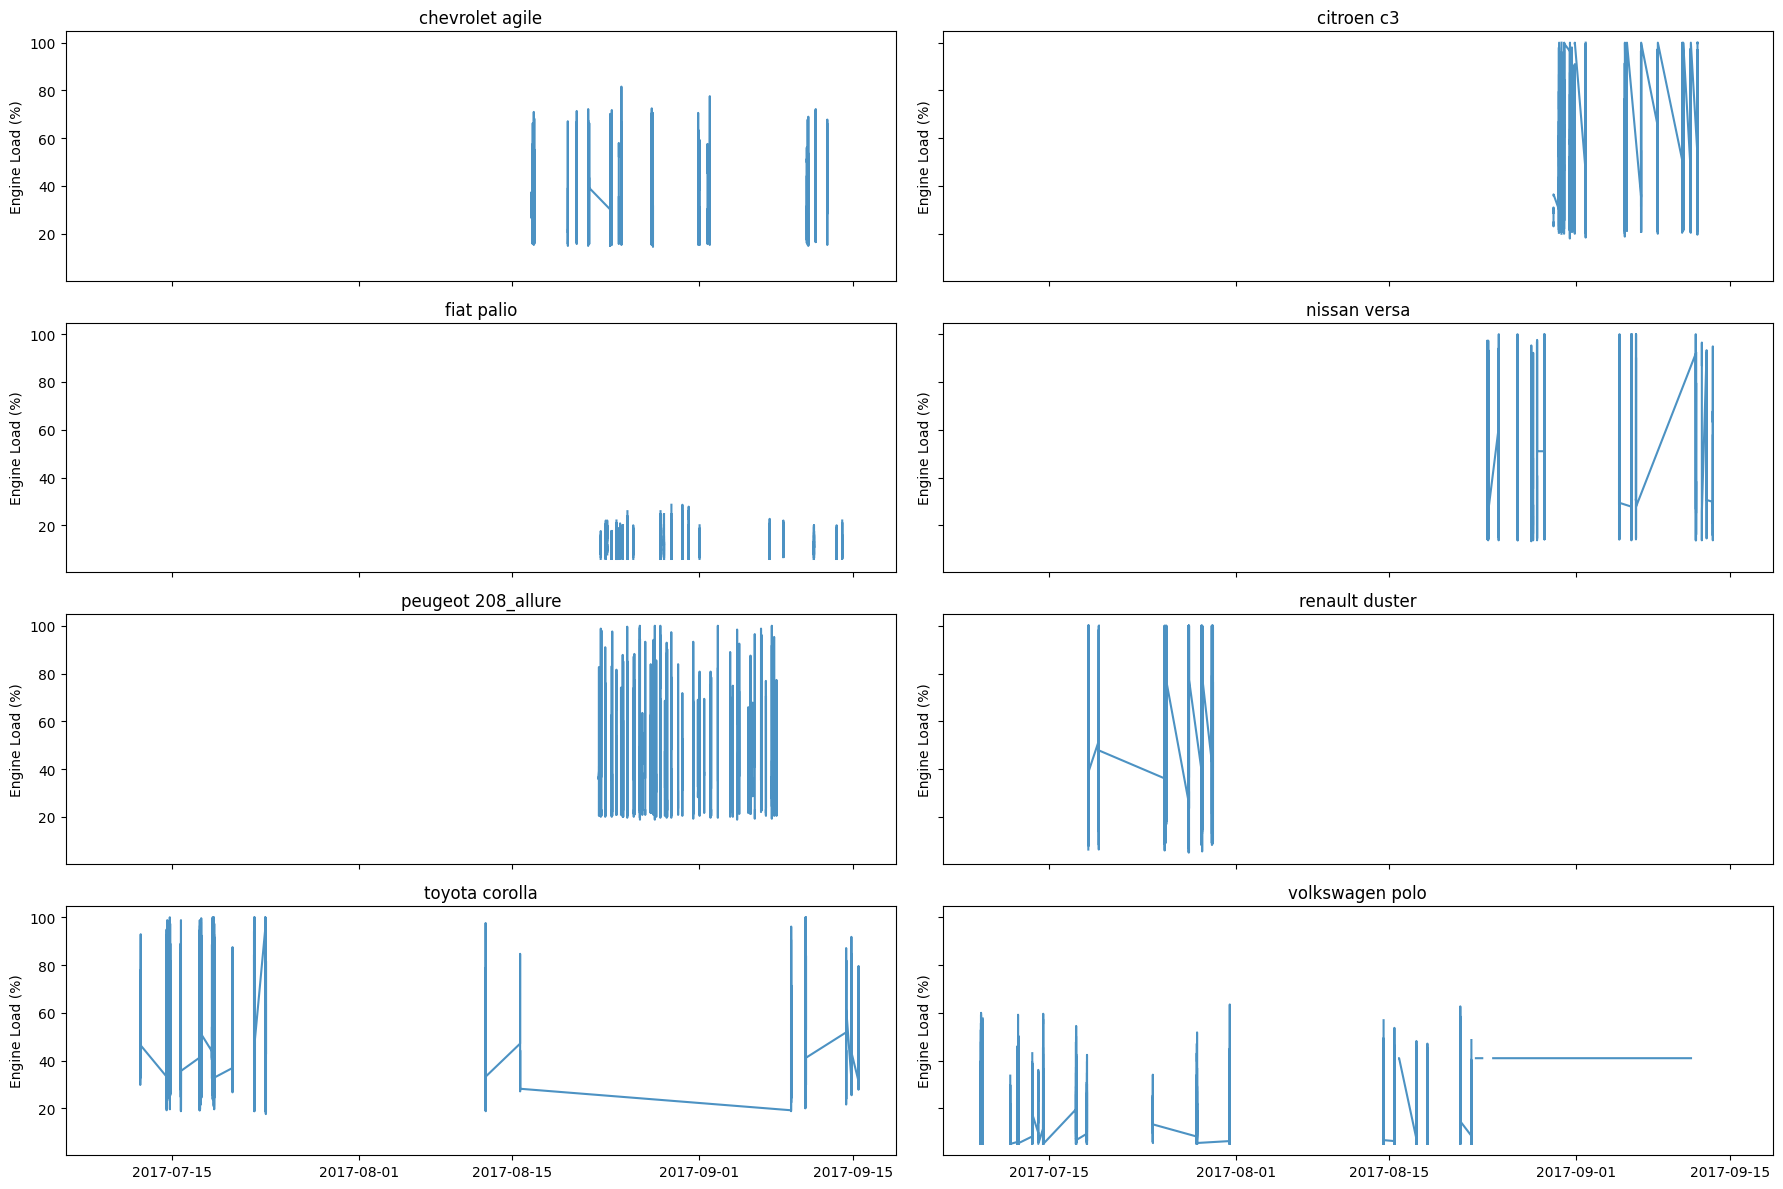

In [90]:
# Motor yükü
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, vid in zip(axes, vehicles):
    g = df_obd[df_obd["VEHICLE_ID"] == vid]
    ax.plot(g.index, g["ENGINE_LOAD"], alpha=0.8)
    ax.set_title(vid)
    ax.set_ylabel("Engine Load (%)")

plt.tight_layout()
plt.show()

In [91]:
# Araç bazlı sensör davranışını özetlemek için rolling window istatistikleri (son 5, 10, 20 kaydın ss'i) üretiyoruz.
# Her araç, kendi geçmiş değerleri üzerinden değerlendiriliyor (araçlar birbirine karışmıyor).
# mean → kısa dönem ortalama seviye
# std  → kısa dönem oynaklık / dengesizlik
windows = [5, 10, 20]

for w in windows:
    df_obd[f"rpm_mean_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_RPM"].transform(lambda x: x.rolling(w).mean()))
    df_obd[f"rpm_std_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_RPM"].transform(lambda x: x.rolling(w).std()))

    df_obd[f"load_mean_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_LOAD"].transform(lambda x: x.rolling(w).mean()))
    df_obd[f"load_std_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_LOAD"].transform(lambda x: x.rolling(w).std()))

    df_obd[f"coolant_mean_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_COOLANT_TEMP"].transform(lambda x: x.rolling(w).mean()))
    df_obd[f"coolant_std_{w}"] = (df_obd.groupby("VEHICLE_ID")["ENGINE_COOLANT_TEMP"].transform(lambda x: x.rolling(w).std()))

    df_obd[f"speed_mean_{w}"] = (df_obd.groupby("VEHICLE_ID")["SPEED"].transform(lambda x: x.rolling(w).mean()))
    df_obd[f"speed_std_{w}"] = (df_obd.groupby("VEHICLE_ID")["SPEED"].transform(lambda x: x.rolling(w).std()))

In [92]:
# Sensörlerdeki bozulma eğilimlerini yakalamak için araç bazlı rolling trend hesaplıyoruz.
# Trend, son 20 gözlem üzerine kurulan lokal bir linear fit’in eğimidir.
# Bu yaklaşım; soğutma sıcaklığı, RPM veya motor yükündeki yavaş ve kademeli değişimleri ortaya çıkarır.
# Araçlar ayrı ayrı işlendiği için trendler karışmaz, her aracın kendi davranışı korunur.

def trend_series(x, window=20):
    return x.rolling(window).apply(
        lambda v: np.polyfit(range(len(v)), v, 1)[0], raw=False)

df_obd["rpm_trend_20"] = df_obd.groupby("VEHICLE_ID")["ENGINE_RPM"].transform(lambda x: trend_series(x))
df_obd["coolant_trend_20"] = df_obd.groupby("VEHICLE_ID")["ENGINE_COOLANT_TEMP"].transform(lambda x: trend_series(x))
df_obd["load_trend_20"] = df_obd.groupby("VEHICLE_ID")["ENGINE_LOAD"].transform(lambda x: trend_series(x))
df_obd["speed_trend_20"] = df_obd.groupby("VEHICLE_ID")["SPEED"].transform(lambda x: trend_series(x))

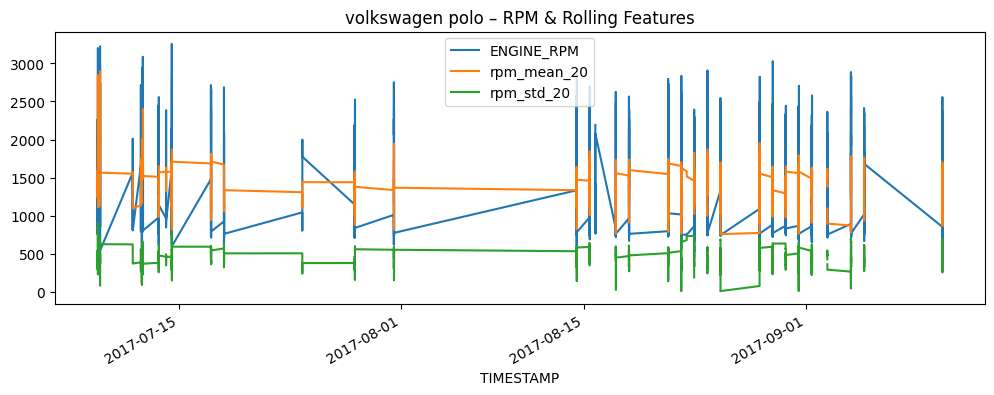

In [93]:
# Polo için rolling mean ve std incelemesi
vehicle = "volkswagen polo"
g = df_obd[df_obd["VEHICLE_ID"] == vehicle]

g[["ENGINE_RPM", "rpm_mean_20", "rpm_std_20"]].plot(figsize=(12,4))
plt.title(f"{vehicle} – RPM & Rolling Features")
plt.show()

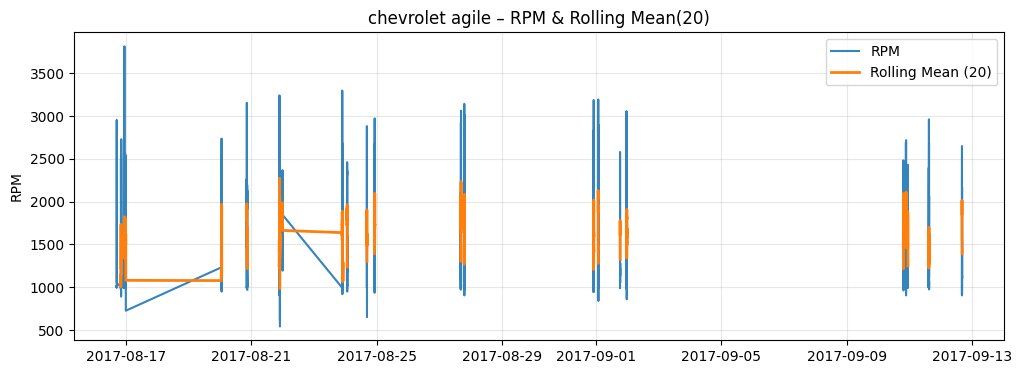

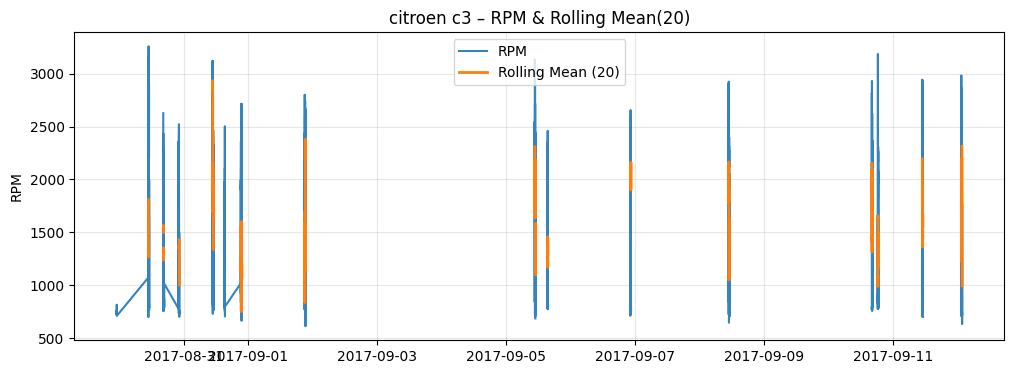

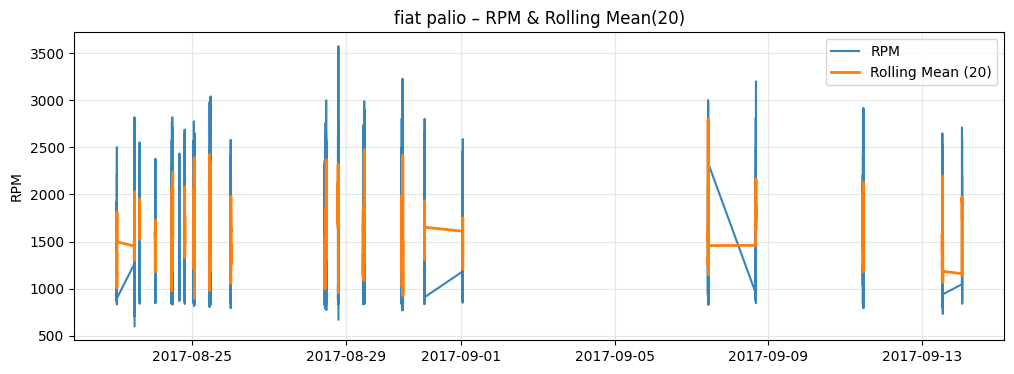

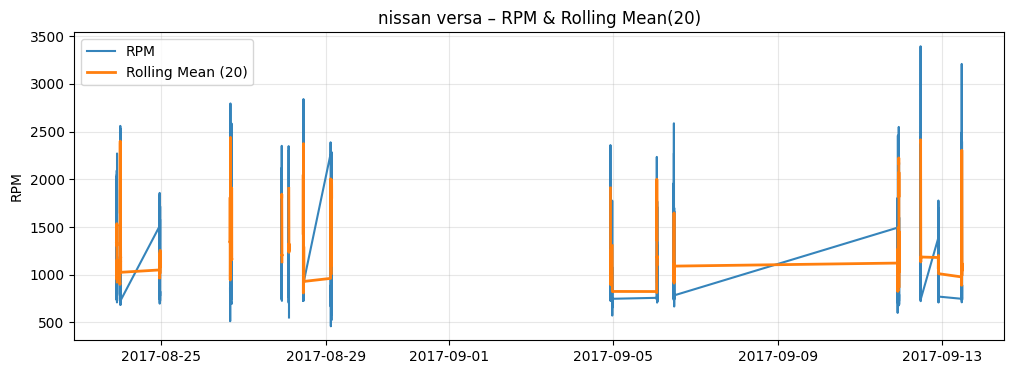

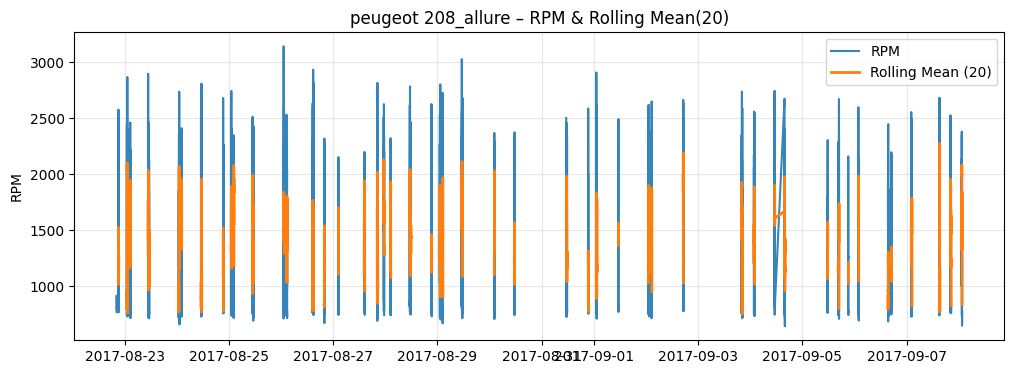

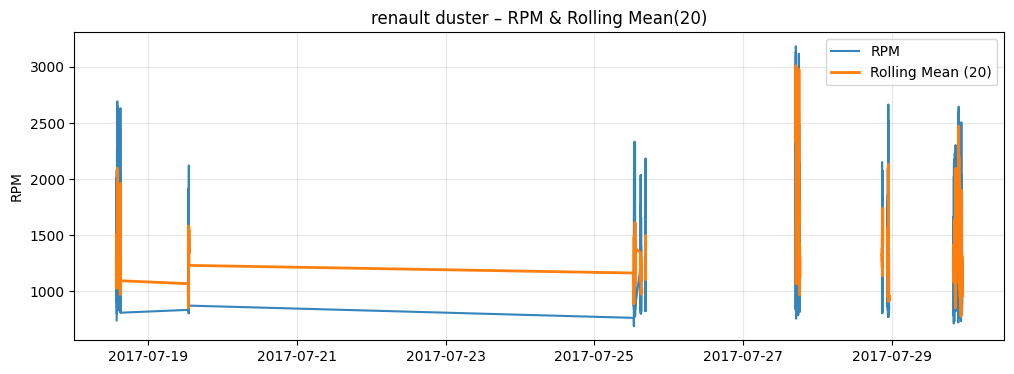

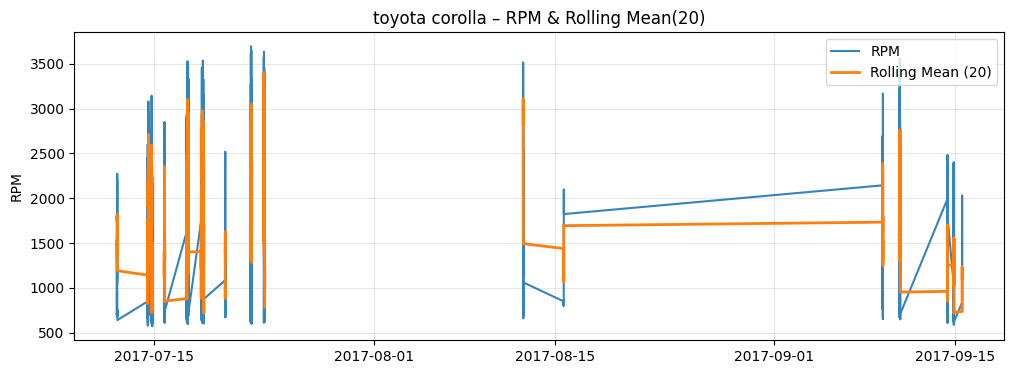

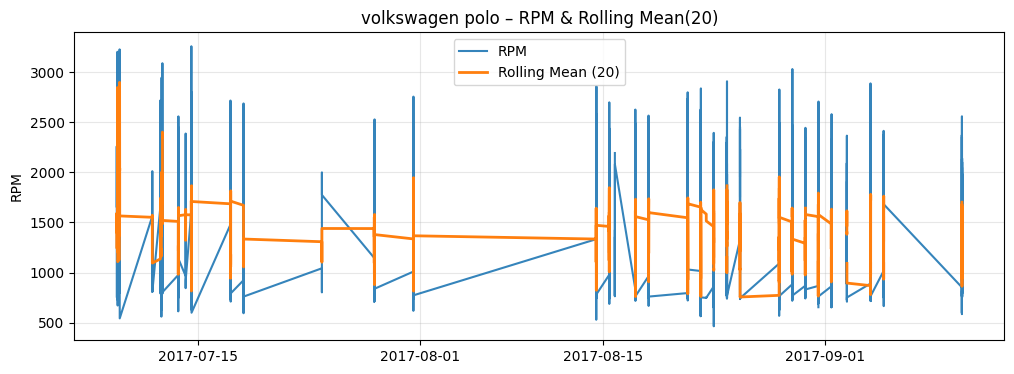

In [94]:
# Araç bazlı rolling feature trend
# Rolling mean
for vid in df_obd["VEHICLE_ID"].unique():
    g = df_obd[df_obd["VEHICLE_ID"] == vid]

    plt.figure(figsize=(12,4))
    plt.plot(g.index, g["ENGINE_RPM"], alpha=0.9, label="RPM")
    plt.plot(g.index, g["rpm_mean_20"], linewidth=2, label="Rolling Mean (20)")
    
    plt.title(f"{vid} – RPM & Rolling Mean(20)")
    plt.ylabel("RPM")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

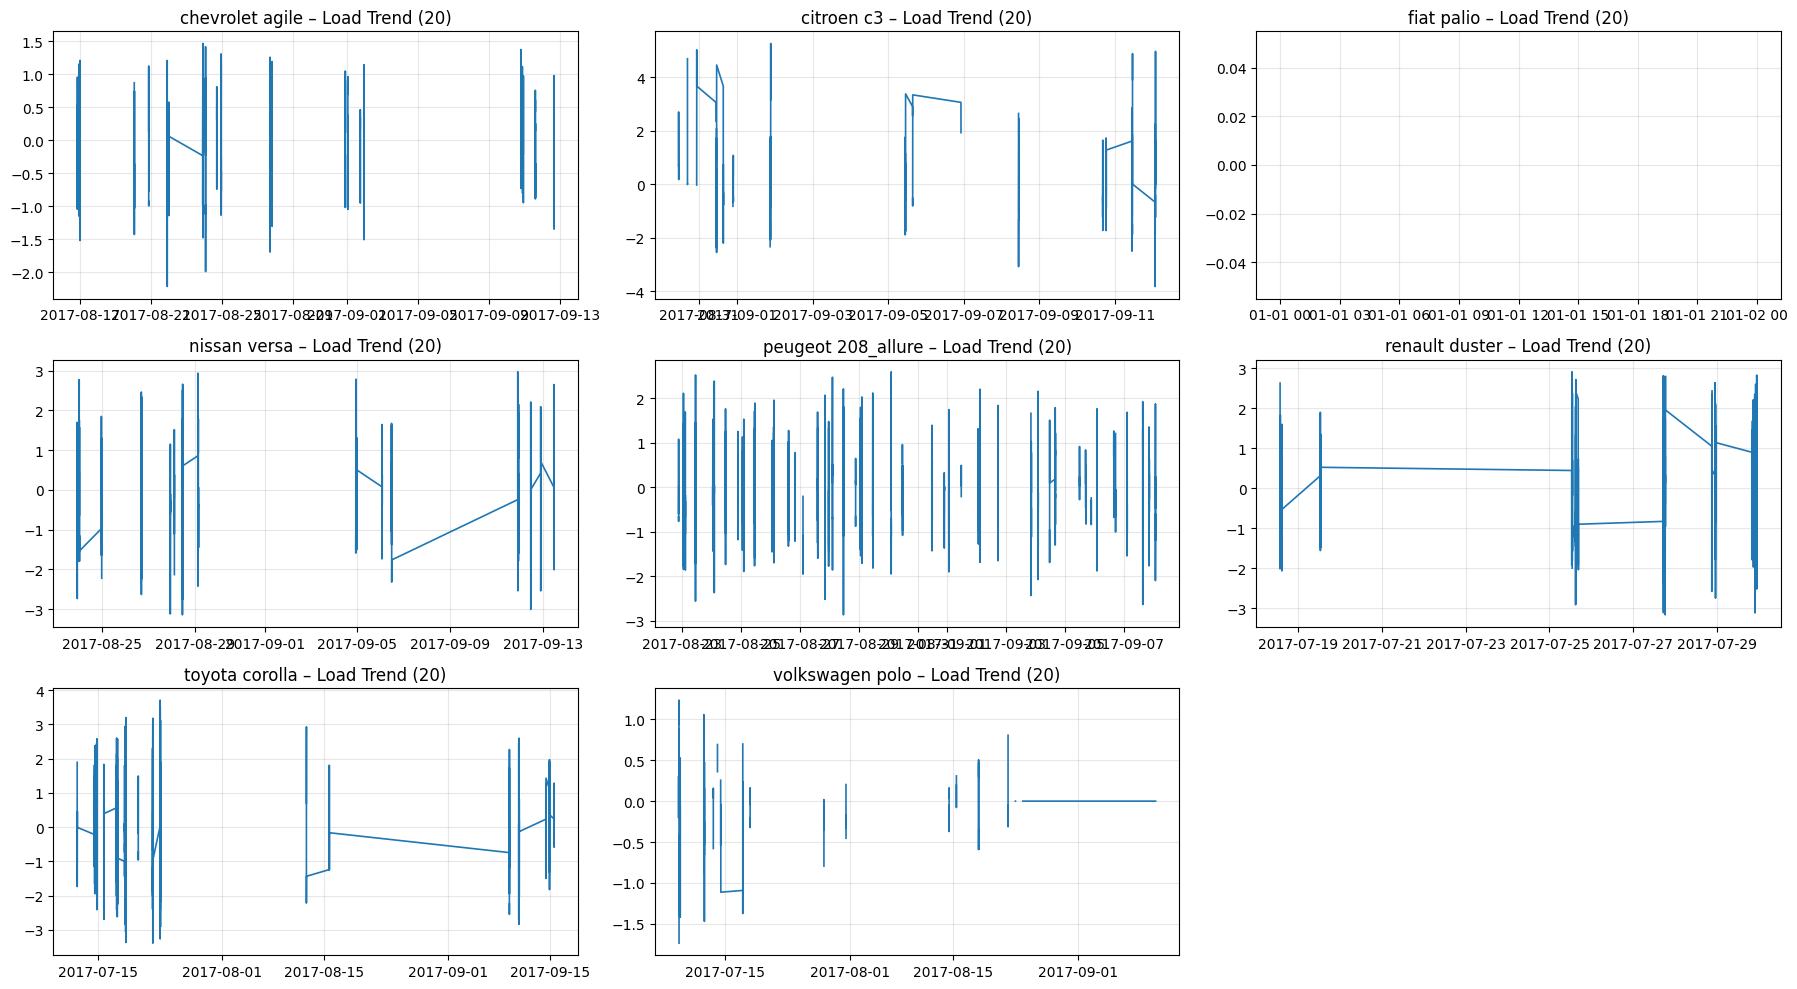

In [95]:
vehicles = df_obd["VEHICLE_ID"].unique()
rows = (len(vehicles) // 3) + 1
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 10), sharex=False)
axes = axes.flatten()

for ax, vid in zip(axes, vehicles):
    g = df_obd[df_obd["VEHICLE_ID"] == vid]

    ax.plot(g.index, g["load_trend_20"], linewidth=1.2)

    ax.set_title(f"{vid} – Load Trend (20)")
    ax.grid(alpha=0.3)

# Boş eksenleri kapat
for i in range(len(vehicles), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [96]:
df_obd[["rpm_trend_20", "load_trend_20", "coolant_trend_20", "speed_trend_20"]].describe().T

,count,mean,std,min,25%,50%,75%,max
rpm_trend_20,27699.0,-1.013936,33.958180,-170.836090,-21.824436,-9.187970e-01,19.228571,162.794737
load_trend_20,21894.0,-0.024306,0.838527,-3.816165,-0.469962,-9.976964e-16,0.365470,5.260150
coolant_trend_20,28706.0,0.047001,0.442845,-4.790226,-0.066165,3.458647e-02,0.175940,2.093985
speed_trend_20,38557.0,-0.032926,1.345918,-7.975940,-0.489474,0.000000e+00,0.370677,7.379699


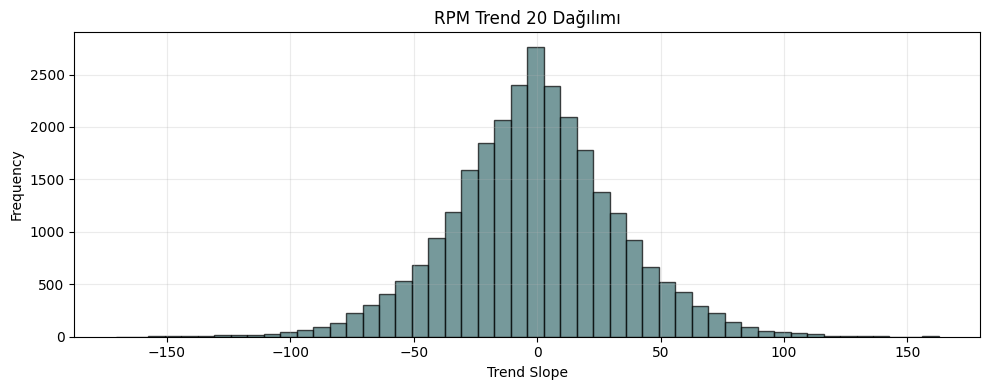

In [97]:
plt.figure(figsize=(10, 4))

plt.hist(df_obd["rpm_trend_20"].dropna(), 
         bins=50, 
         color="#3C6E71", 
         edgecolor="black", 
         alpha=0.7)

plt.title("RPM Trend 20 Dağılımı", fontsize=12)
plt.xlabel("Trend Slope")
plt.ylabel("Frequency")
plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()